- Importando bibliotecas e carregando os dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import special
import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
url='https://raw.githubusercontent.com/robertferro/detectando_fraude/main/1-%20ETL/dados_fraude.csv'

In [3]:
fraude_df = pd.read_csv(url, header=0)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


- Visualizando a distribuição por gênero.

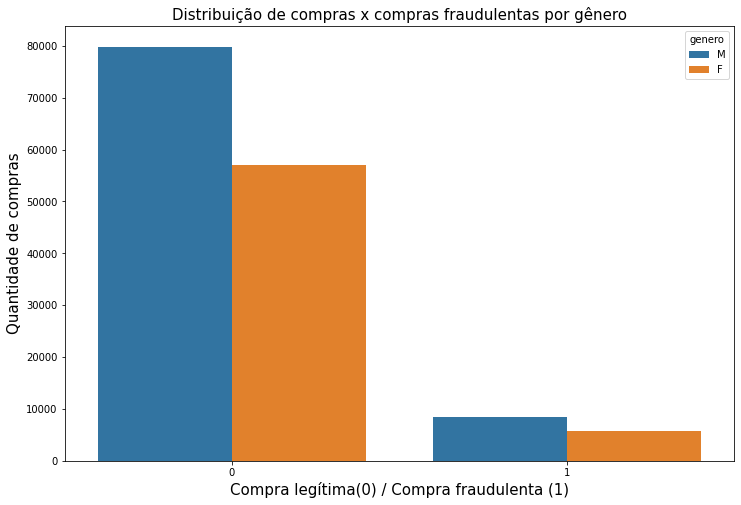

In [4]:
fig , ax  = plt.subplots(1,1 ,figsize=(12,8))
ax = sns.countplot(x='fraude',hue='genero',data=fraude_df)
ax.set_xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
ax.set_ylabel('Quantidade de compras', fontsize=15)
ax.set_title('Distribuição de compras x compras fraudulentas por gênero',fontsize=15)
ax=ax

Relação entre valor de compra e fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


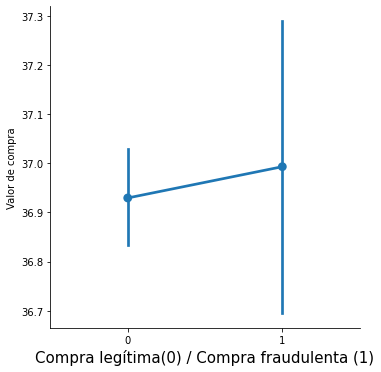

In [5]:
sns.factorplot(x='fraude',y='valor',data=fraude_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Valor de compra')
plt.show()

Relação entre idade e fraude.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


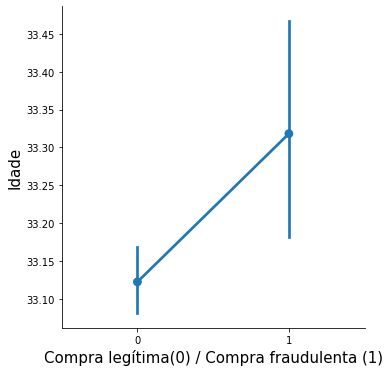

In [6]:
sns.factorplot(x='fraude',y='idade',data=fraude_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Idade',fontsize=15)
plt.show()

Relação da fonte de marketing com fraude.

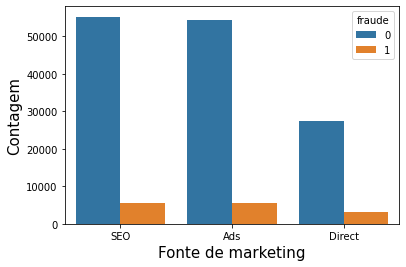

In [7]:
sns.countplot(x='fonte', hue='fraude',data=fraude_df)
plt.xlabel('Fonte de marketing', fontsize=15)
plt.ylabel('Contagem',fontsize=15)
plt.show()

Visualizando as fraudes por país.

In [8]:
#  criando 2 novos datasets para gerar as visualiazções.

sum_f = fraude_df[fraude_df['fraude']==1]['fraude'].groupby(fraude_df.pais).sum()
sum_f = sum_f.to_frame().reset_index()


sum_nf = fraude_df[fraude_df['fraude']==0]['fraude'].groupby(fraude_df.pais).sum()
sum_nf = sum_nf.to_frame().reset_index()

In [9]:
sum_f.sort_values('fraude',ascending=False)

,pais,fraude
103,United States,5551
17,China,1043
47,Japan,715
102,United Kingdom,477
50,Korea Republic of,380
...,...,...
29,Estonia,1
20,Cote D'ivoire,1
12,Bosnia and Herzegowina,1
2,Angola,1


Text(0, 0.5, 'Países')

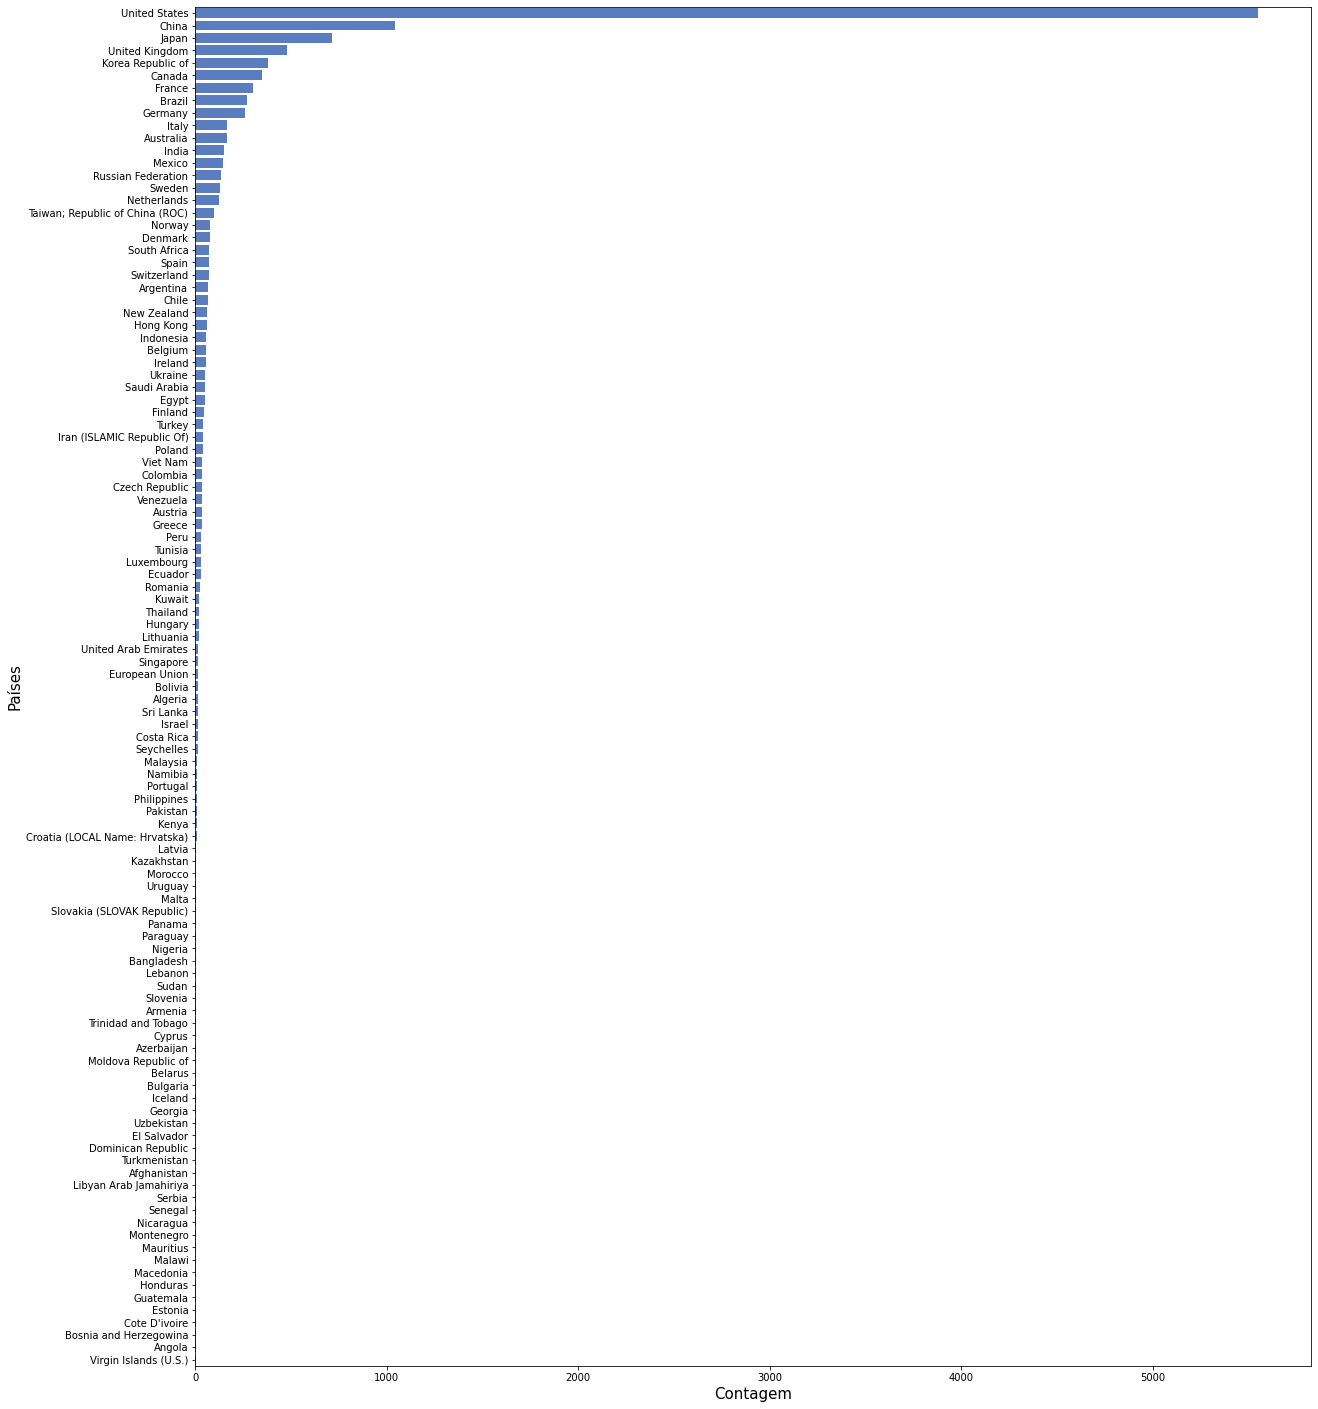

In [10]:
f,ax = plt.subplots(figsize=(20,25))
sns.set_color_codes('muted')
sns.barplot(x='fraude', y='pais', data=sum_f.sort_values('fraude',ascending=False),
           label = 'Total', color='b')
plt.xlabel('Contagem',fontsize=15)
plt.ylabel('Países',fontsize=15)

Contando o número de ids por usuário pra cada dispositivo e pra cada IP.

In [11]:
tmp_df = pd.DataFrame(columns=('fraude','id_por_dispositivo','id_por_ip'))
tmp_df['fraude'] = fraude_df['fraude']

userid_count = fraude_df.groupby('id_dispositivo').id.count()
tmp_df['id_por_dispositivo'] = fraude_df['id_dispositivo'].apply(lambda x: userid_count[x])

userid_count2 = fraude_df.groupby('ip').id.count()
tmp_df['id_por_ip'] = fraude_df['ip'].apply(lambda x: userid_count2[x])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


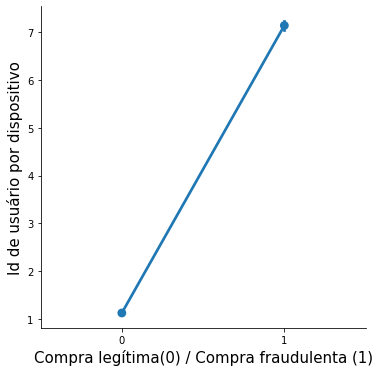

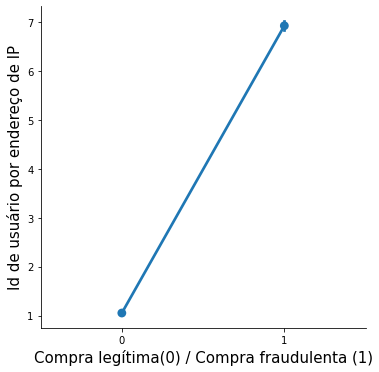

In [12]:
sns.factorplot(x='fraude',y='id_por_dispositivo',data=tmp_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Id de usuário por dispositivo',fontsize=15)


sns.factorplot(x='fraude',y='id_por_ip',data=tmp_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Id de usuário por endereço de IP',fontsize=15)
plt.show()


Relação entre tempo de inscrição e a compra da fraude.

In [13]:
tmp_df['cadastro'] = fraude_df.cadastro.apply(pd.to_datetime)
tmp_df['compra'] = fraude_df.compra.apply(pd.to_datetime)


#  tempo até effetuar a compra

tmp_df['tempo'] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


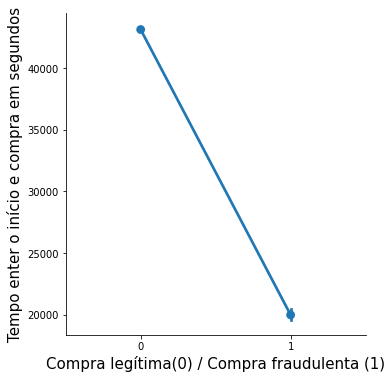

In [14]:
sns.factorplot(x='fraude', y='tempo', data=tmp_df)
plt.xlabel('Compra legítima(0) / Compra fraudulenta (1)', fontsize=15)
plt.ylabel('Tempo enter o início e compra em segundos',fontsize=15)
plt.show()

In [15]:
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Analisando os dias da semana que costumam acontecer fraudes.

Text(0, 0.5, 'Contagem')

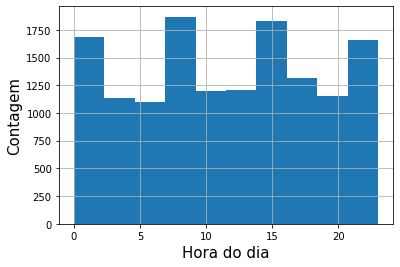

In [16]:
tmp_df[tmp_df['fraude']==1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel('Hora do dia', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

Text(0, 0.5, 'Contagem')

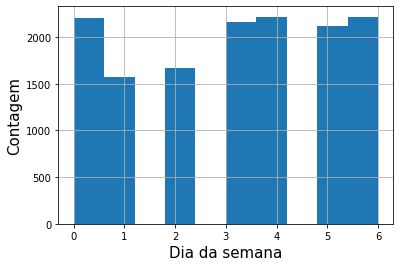

In [17]:
tmp_df[tmp_df['fraude']==1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel('Dia da semana', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

Text(0, 0.5, 'Contagem')

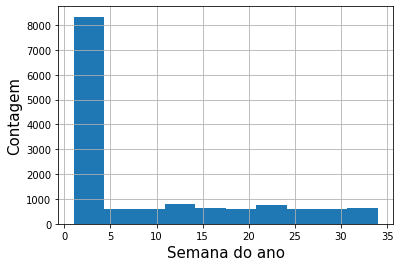

In [18]:
tmp_df[tmp_df['fraude']==1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel('Semana do ano', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

In [19]:
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Criando a coluna referente a quantidade de ids de usuários exclusivos, associado a um dispositivo.

In [20]:
userid_count3 = fraude_df.groupby('id_dispositivo').id.count()
fraude_df['id_por_dispositvo'] = fraude_df.id_dispositivo.apply(lambda x: userid_count3[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositvo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


Criandoa coluna referente ao número de ip.

In [21]:
userid_count4 = fraude_df.groupby('ip').id.count()
fraude_df['id_por_ip'] = fraude_df.ip.apply(lambda x: userid_count4[x])

fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositvo,id_por_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1


In [22]:
fraude_df['media_id'] = (fraude_df.id_por_dispositvo + fraude_df.id_por_ip ) * 0.5
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositvo,id_por_ip,media_id
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0


- Convertendo colunas para formato datetime e adicionando a coluna referente a duração da compra.

In [23]:
fraude_df['cadastro'] = fraude_df['cadastro'].apply(pd.to_datetime)
fraude_df['compra'] = fraude_df['compra'].apply(pd.to_datetime)

fraude_df['tempo'] = (fraude_df.compra - fraude_df.cadastro).apply(lambda x: x.seconds)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositvo,id_por_ip,media_id,tempo
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461


- Atribuindo valor numérico a coluna pais.

In [24]:
pais_dummies = pd.get_dummies(fraude_df['pais'], prefix='pais')

fraude_df = pd.concat([fraude_df, pais_dummies],axis=1)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais,id_por_dispositvo,id_por_ip,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,...,pais_Saint Kitts and Nevis,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,1,1.0,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,1.0,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12,12,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN,1,1,1.0,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1,1,1.0,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


- Excluindo colunas que não serão úteis.

In [25]:
fraude_df.drop(['id',
                'cadastro',
                'compra',
                'id_dispositivo',
                'ip',
                'id_por_dispositvo',
                'id_por_ip',
                'pais',
                'fonte',
                'browser',
                'genero',
                'idade',
                'valor'], axis=1, inplace=True)

In [26]:
fraude_df.head()

,fraude,media_id,tempo,pais_Afghanistan,pais_Albania,pais_Algeria,pais_Angola,pais_Antigua and Barbuda,pais_Argentina,pais_Armenia,pais_Australia,pais_Austria,pais_Azerbaijan,pais_Bahamas,pais_Bahrain,pais_Bangladesh,pais_Barbados,pais_Belarus,pais_Belgium,pais_Belize,pais_Benin,pais_Bermuda,pais_Bhutan,pais_Bolivia,pais_Bonaire; Sint Eustatius; Saba,pais_Bosnia and Herzegowina,pais_Botswana,pais_Brazil,pais_British Indian Ocean Territory,pais_Brunei Darussalam,pais_Bulgaria,pais_Burkina Faso,pais_Burundi,pais_Cambodia,pais_Cameroon,pais_Canada,pais_Cape Verde,pais_Cayman Islands,pais_Chile,pais_China,...,pais_Saint Kitts and Nevis,pais_Saint Martin,pais_San Marino,pais_Saudi Arabia,pais_Senegal,pais_Serbia,pais_Seychelles,pais_Singapore,pais_Slovakia (SLOVAK Republic),pais_Slovenia,pais_South Africa,pais_South Sudan,pais_Spain,pais_Sri Lanka,pais_Sudan,pais_Sweden,pais_Switzerland,pais_Syrian Arab Republic,pais_Taiwan; Republic of China (ROC),pais_Tajikistan,pais_Tanzania United Republic of,pais_Thailand,pais_Trinidad and Tobago,pais_Tunisia,pais_Turkey,pais_Turkmenistan,pais_Uganda,pais_Ukraine,pais_United Arab Emirates,pais_United Kingdom,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,0,1.0,13882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1.0,17944,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,12.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,60085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1.0,41461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Contagem normalizada')

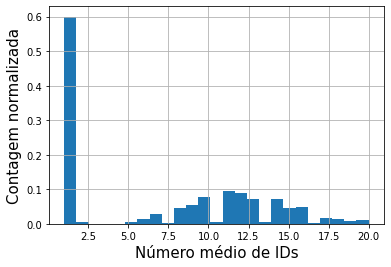

In [27]:
fraude_df[fraude_df['fraude'] == 1].media_id.hist(density=True, bins=25)
plt.xlabel('Número médio de IDs',fontsize=15)
plt.ylabel('Contagem normalizada', fontsize=15)

Text(0, 0.5, 'Contagem normalizada')

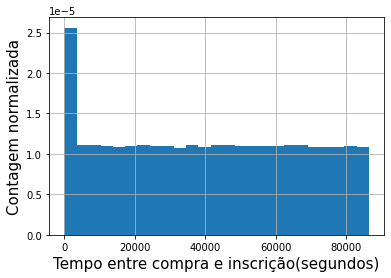

In [28]:
fraude_df['tempo'].hist(density=True, bins=25)
plt.xlabel('Tempo entre compra e inscrição(segundos)',fontsize=15)
plt.ylabel('Contagem normalizada', fontsize=15)

In [29]:
def rescale_series(ser):
  ser_min = ser.min() - 1e-5
  ser_max = ser.max() + 1e-5
  new_ser = (ser - ser_min)/ (ser_max - ser_min)
  new_ser = new_ser.apply( lambda x: np.sqrt(2)*special.erfinv(2*x -1))
  return new_ser

fraude_df['tempo'] = rescale_series(fraude_df.tempo)

In [30]:
fraude_df['tempo'].min()

-6.338849760138268

In [31]:
fraude_df['tempo'].max()

6.338849760138268

In [32]:
fraude_df['tempo']

0        -0.991735
1        -0.814503
2        -6.338850
3         0.511309
4        -0.050474
            ...   
151107    1.247591
151108    0.767455
151109   -0.430229
151110    0.154936
151111    0.816000
Name: tempo, Length: 151112, dtype: float64

Text(0, 0.5, 'Contagem normalizada')

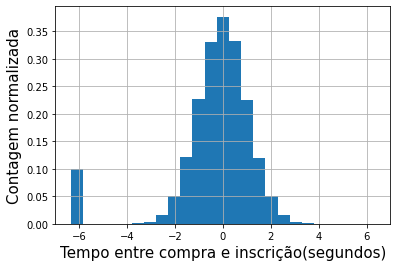

In [33]:
fraude_df['tempo'].hist(density=True, bins=25)
plt.xlabel('Tempo entre compra e inscrição(segundos)',fontsize=15)
plt.ylabel('Contagem normalizada', fontsize=15)

- Reescalando todos os dados do dataframe e  salvando 2 novos bancos de dados.

In [34]:
def rescale_series(ser):
  ser_min = ser.min() - 1e-5
  ser_max = ser.max() + 1e-5
  new_ser = (ser - ser_min)/ (ser_max - ser_min)
  return new_ser

onehotencoded = [feature for feature in fraude_df.columns if 'pais' not in feature and feature != 'fraude']

for col in onehotencoded:
  fraude_df[col] = rescale_series(fraude_df[col])


In [36]:
fraude_df.to_csv('dados_pre_processados.csv',index=False)